In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pickle

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_curve, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score,auc, roc_curve
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [5]:
DATA_FOLDER = '../data/advertising.csv'

data = pd.read_csv(DATA_FOLDER)

Converting Date Time to numerical

In [34]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [35]:
data['month'] = data['Timestamp'].dt.month
data['day'] = data['Timestamp'].dt.day
data['hour'] = data['Timestamp'].dt.hour

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [38]:
data.sample(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
434,83.55,39,65816.38,221.18,Switchable well-modulated infrastructure,Elizabethmouth,1,Myanmar,2016-06-08 20:13:27,0
336,87.26,35,63060.55,184.03,Multi-layered tangible portal,New Paul,0,Bosnia and Herzegovina,2016-05-12 04:35:59,0
948,59.01,30,75265.96,178.75,Focused multimedia implementation,West Annefort,1,Philippines,2016-02-08 22:45:26,1


In [26]:
trf1 = ColumnTransformer([
    ('ordinal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), [4, 5, 7])
], remainder='passthrough')

In [27]:
trf2 = ColumnTransformer([
    ('scaling', MinMaxScaler(), slice(0, 7))
])

In [28]:
trf3 = RandomForestClassifier()

In [29]:
pipe = Pipeline(
    [
        ('trf1', trf1),
        ('trf2',trf2),
        ('trf3', trf3)
    ]
)

In [30]:
X = data.drop(columns=['Clicked on Ad', 'Timestamp'])
y = data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal_encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [4, 5, 7])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  slice(0, 7, None))])),
                ('trf3', RandomForestClassifier())])

In [35]:
y_pred = pipe.predict(X_test)
accuracy_score(y_pred, y_test)

0.935

In [36]:
pickle.dump(pipe, open('pipe.pkl', 'wb'))

In [37]:
data.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

Converting categorical columns to numerical(City, Country, Ad Topic Line)

In [6]:
data['City'].nunique()

969

In [7]:
data['Ad Topic Line'].nunique()

1000

In [8]:
data['Country'].nunique()

237

In [41]:
data['Country']

0                     Tunisia
1                       Nauru
2                  San Marino
3                       Italy
4                     Iceland
                ...          
995                   Lebanon
996    Bosnia and Herzegovina
997                  Mongolia
998                 Guatemala
999                    Brazil
Name: Country, Length: 1000, dtype: object

Converting the country column to numerical(a value between 0-1)

In [46]:
data.sample(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,month,day,hour
313,0.672956,0.333333,0.721941,0.881281,0.848849,0.107438,1,0.758475,2016-05-19 11:16:59,0,0.666667,0.600000,0.478261
626,0.903791,0.190476,0.584306,0.526698,0.389389,0.803719,1,0.605932,2016-04-09 23:26:42,0,0.500000,0.266667,1.000000
613,0.741288,0.285714,0.791568,0.751665,0.023023,0.422521,1,0.105932,2016-06-19 23:21:38,0,0.833333,0.600000,1.000000


In [47]:
X = data.drop(columns=['Clicked on Ad', 'Timestamp'])
y = data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 11), (200, 11), (800,), (200,))

In [49]:
X_train.sample(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,month,day,hour
968,0.212137,0.452381,0.326055,0.124046,0.861862,0.215909,0,0.500000,0.333333,0.866667,0.347826
717,0.890872,0.238095,0.699379,0.531057,0.181181,0.211777,0,0.813559,0.666667,0.066667,0.695652


In [24]:
y_train

29     0
535    0
695    0
557    0
836    1
      ..
106    0
270    1
860    1
435    1
102    0
Name: Clicked on Ad, Length: 800, dtype: int64

In [25]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.935

In [26]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
accuracy_score(y_test, y_pred)

0.935

In [27]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.93

In [28]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.905

Finding optimal hyperparameter using GridSearchCV

In [66]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [20, 50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf' : [1,2,4,8],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 20}
Best cross-validation accuracy: 0.9675


c:\Users\Venkat\Ad_click_prediction\env\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [40]:
best_model_rf = grid_search.best_estimator_

In [41]:
y_pred = best_model_rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.94

Precision: 0.94
Recall: 0.95
Confusion Matrix:
[[ 82   7]
 [  5 106]]


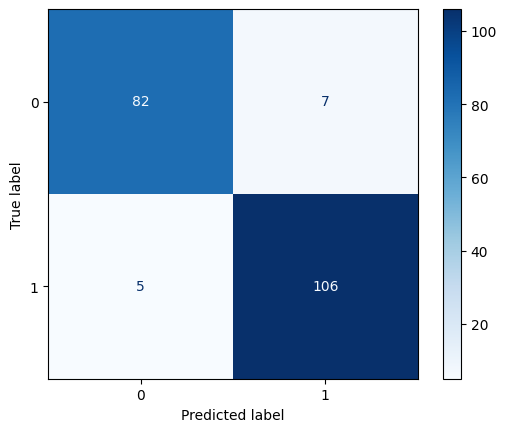

In [42]:
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model_rf.classes_)
disp.plot(cmap='Blues')

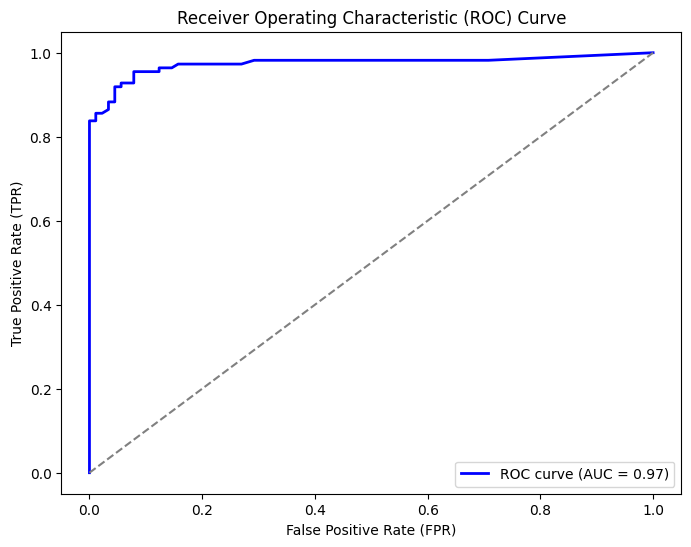

In [43]:
y_prob = best_model_rf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


C:\Users\Venkat\AppData\Local\Temp\ipykernel_32344\715930203.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


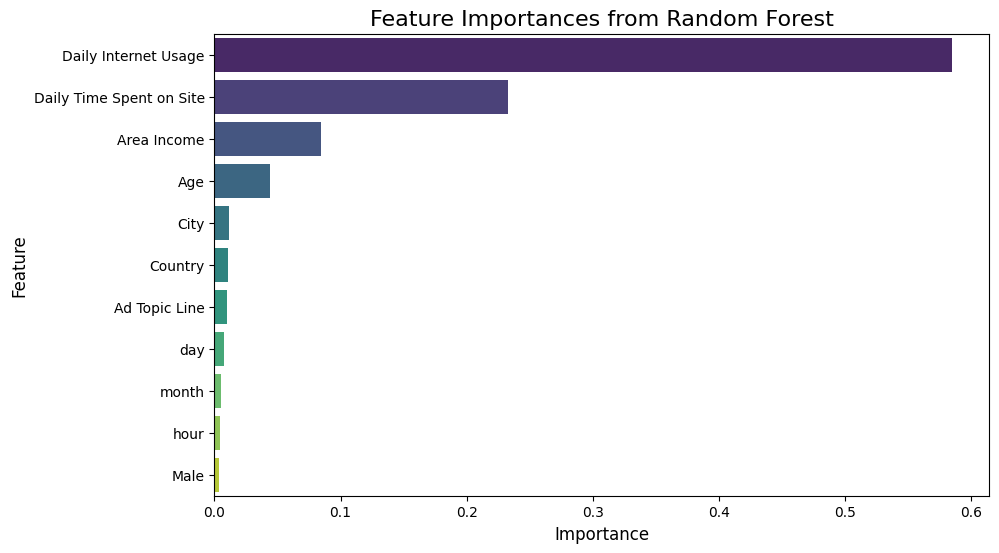

In [45]:
importances = best_model_rf.feature_importances_
feature_names = X_train.columns

feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances from Random Forest', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()


Gradient Boosting

In [27]:
gb = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],             
    'learning_rate': [0.01, 0.1, 0.2],         
    'max_depth': [3, 5, 7],           
    'min_samples_split': [2, 5, 10],      
    'min_samples_leaf': [1, 2, 4],                         
}

grid_search_gb = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring='accuracy',  
    cv=5,                
    n_jobs=-1,           
    verbose=1            
)

grid_search_gb.fit(X_train, y_train)

print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best cross-validation accuracy:", grid_search_gb.best_score_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


c:\Users\Venkat\Ad_click_prediction\env\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation accuracy: 0.9625


In [34]:
best_model_gb = grid_search_gb.best_estimator_

In [35]:
y_pred = best_model_gb.predict(X_test)
accuracy_score(y_pred, y_test)

0.925

Precision: 0.94
Recall: 0.93
Confusion Matrix:
[[ 82   7]
 [  8 103]]


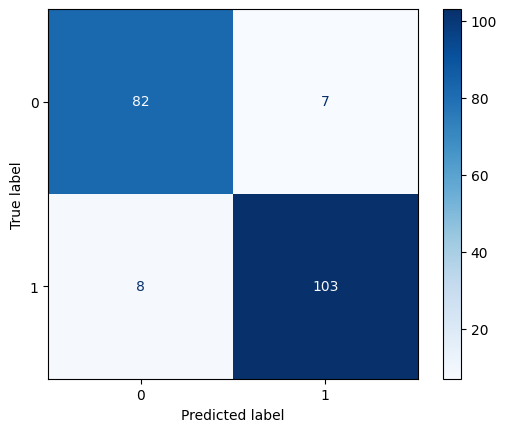

In [36]:
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model_gb.classes_)
disp.plot(cmap='Blues')

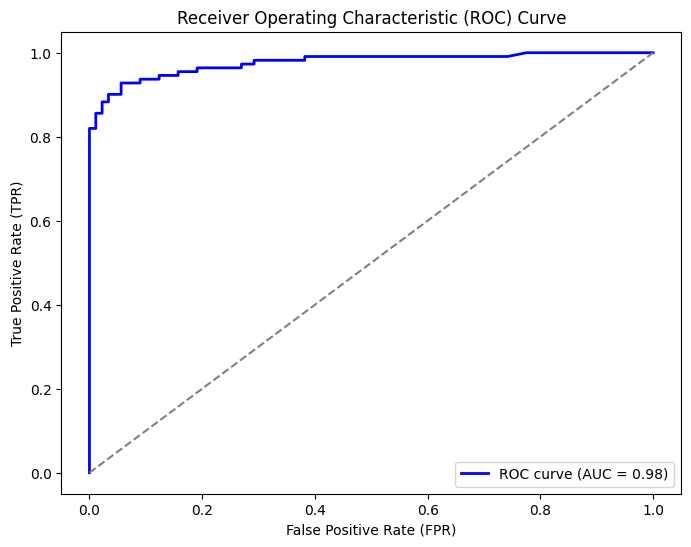

In [39]:
y_prob = best_model_gb.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

C:\Users\Venkat\AppData\Local\Temp\ipykernel_32344\1856794268.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


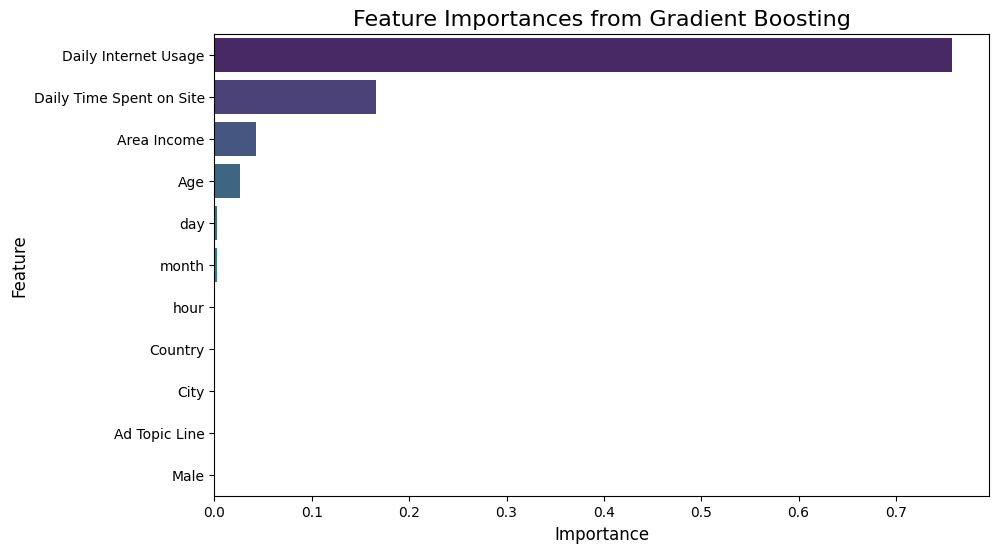

In [77]:
importances = best_model_gb.feature_importances_
feature_names = X_train.columns

feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances from Gradient Boosting', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()


In [70]:
svc = SVC(random_state=42)

param_grid = {
    'C': [0.1, 1, 10, 100],               
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  
    'degree': [2, 3, 4],                  
    'gamma': ['scale', 'auto', 0.001, 0.01],  
    'coef0': [0.0, 0.1, 0.5]             
}

# Set up GridSearchCV
grid_search_svc = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    scoring='accuracy',   
    cv=5,                 
    n_jobs=-1,            # Use all available cores
    verbose=1             # Display progress
)

grid_search_svc.fit(X_train, y_train)

print("Best parameters for SVC:", grid_search_svc.best_params_)
print("Best cross-validation accuracy:", grid_search_svc.best_score_)


Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best parameters for SVC: {'C': 1, 'coef0': 0.1, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
Best cross-validation accuracy: 0.97625


In [71]:
best_model_svc = grid_search.best_estimator_

In [72]:
y_pred = best_model_svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.94

Precision: 0.94
Recall: 0.95
Confusion Matrix:
[[ 82   7]
 [  5 106]]


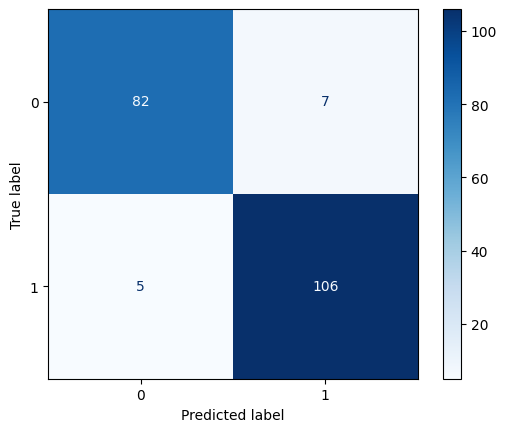

In [74]:
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model_svc.classes_)
disp.plot(cmap='Blues')

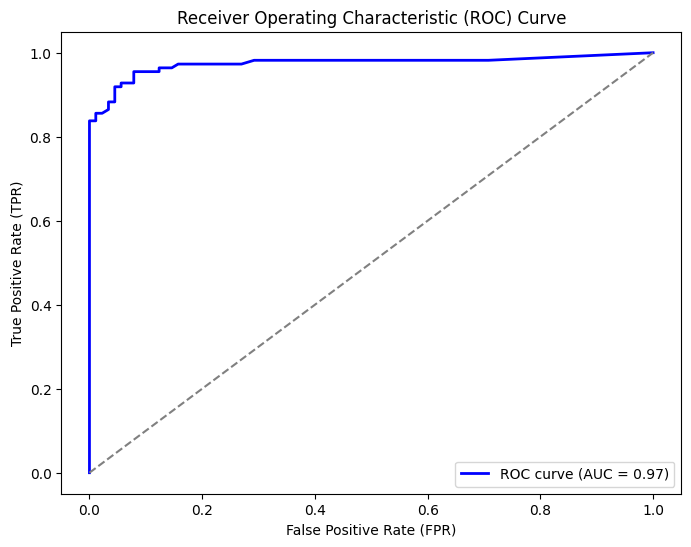

In [75]:
y_prob = best_model_svc.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

C:\Users\Venkat\AppData\Local\Temp\ipykernel_32344\2611296314.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


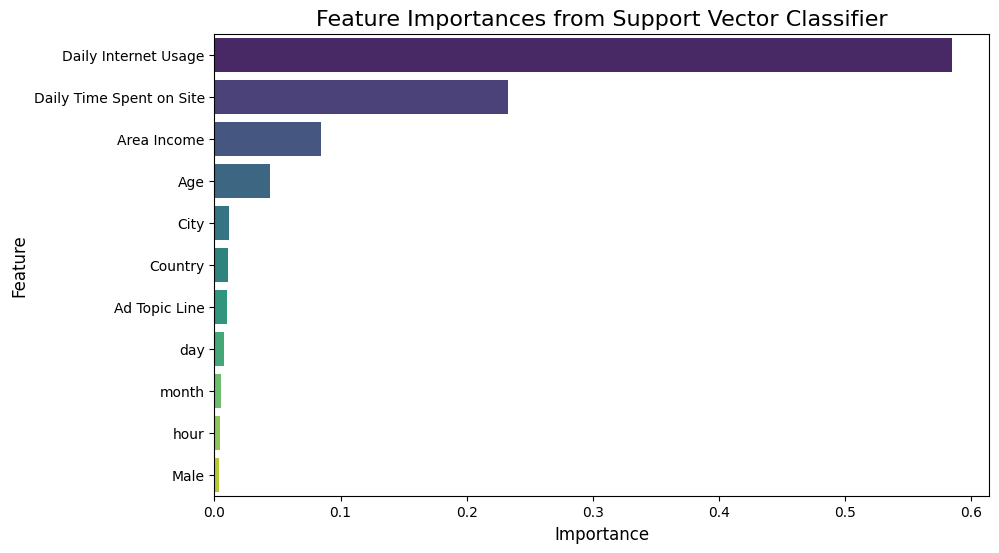

In [78]:
importances = best_model_svc.feature_importances_
feature_names = X_train.columns

feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances from Support Vector Classifier', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()


In [81]:
import lightgbm as lgb


In [85]:
lgb_model = lgb.LGBMClassifier(random_state=42)

param_grid = {
    'num_leaves': [31, 40, 50],
    'max_depth': [-1, 10, 20],   
    'learning_rate': [0.05, 0.1, 0.2], 
    'n_estimators': [50, 100, 200],
    'subsample': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=lgb_model, 
                           param_grid=param_grid, 
                           cv=5,  
                           scoring='accuracy', 
                           n_jobs=-1,  
                           verbose=1)  

grid_search.fit(X_train, y_train)

print("Best Parameters found: ", grid_search.best_params_)
print("Best accuracy", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print(f"Accuracy on test set: {accuracy_score(y_test, y_pred)}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


c:\Users\Venkat\Ad_click_prediction\env\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 389, number of negative: 411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1556
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.486250 -> initscore=-0.055014
[LightGBM] [Info] Start training from score -0.055014
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

Precision: 0.94
Recall: 0.93
Confusion Matrix:
[[ 83   6]
 [  8 103]]


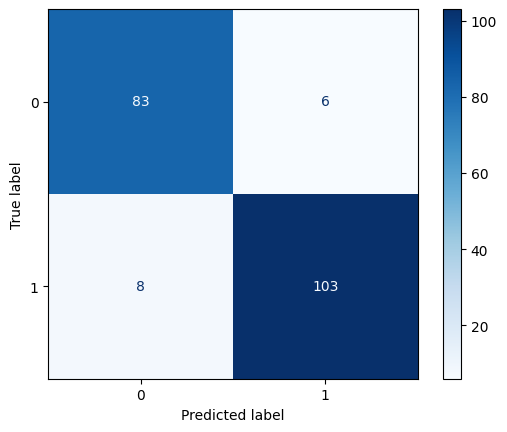

In [86]:
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model_svc.classes_)
disp.plot(cmap='Blues')

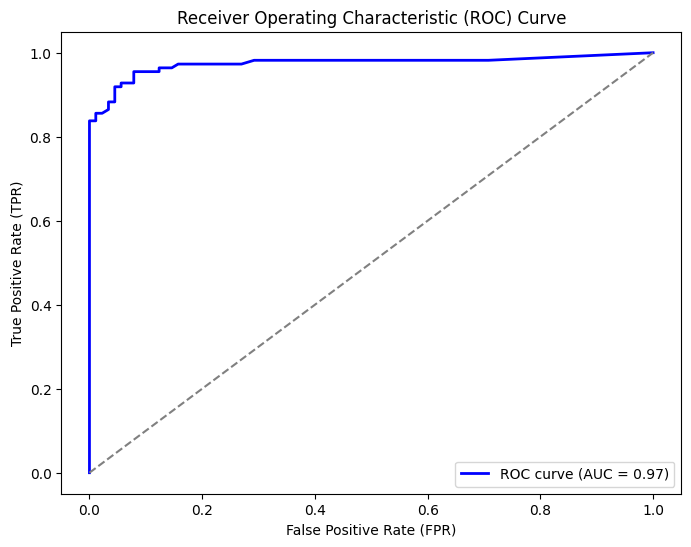

In [87]:
y_prob = best_model_svc.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

C:\Users\Venkat\AppData\Local\Temp\ipykernel_32344\2086413164.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


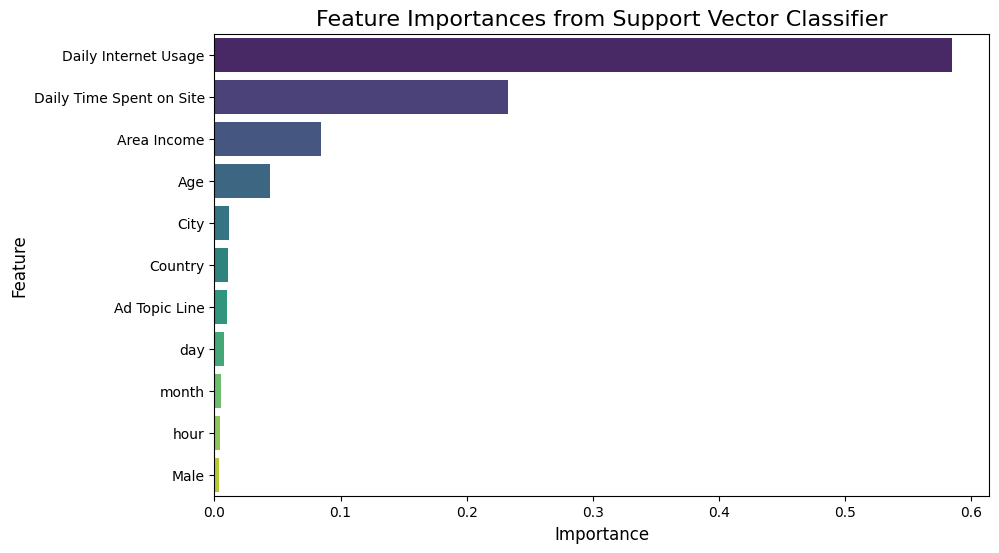

In [88]:
importances = best_model_svc.feature_importances_
feature_names = X_train.columns

feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances from Support Vector Classifier', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

In [95]:
MODELS_FOLDER = "../models"
MODELS_OUTPUT_FILE = f"{MODELS_FOLDER}/rf_model.pkl"

with open(MODELS_OUTPUT_FILE, "wb") as f:
    pickle.dump(best_model_rf, f)

In [50]:
with open('../models/preprocessors.pkl', 'wb') as f:
    pickle.dump({
        "le_country": le_country,
        "le_city": le_city,
        "le_topic": le_topic,
        "scaler": scaler
    }, f)